### 데이터 출처
- [고용행정통계]
    - https://eis.work.go.kr/eisps/rpt/reptDtl.do?menuId=020040020
- [국가통계포털 KOSIS]
    - https://kosis.kr/statisticsList/statisticsListIndex.do?parentId=P2.1&vwcd=MT_ZTITLE&menuId=M_01_01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')

In [2]:
df_price = pd.read_csv('소비자물가지수.csv', encoding = 'euc-kr', index_col = 0)
df_price = df_price.transpose()
df_price

,전국
2018,99.086
2019,99.466
2020,100.000
2021,102.500
2022,107.710


In [3]:
df_price.index.to_list()

['2018', '2019', '2020', '2021', '2022']

In [4]:
# df_job = pd.read_csv('구인구직취업현황.csv', encoding = 'utf-8', index_col = 0)
df_job = pd.read_csv('구인구직취업현황.csv', encoding = 'utf-8', index_col = [0, 1])
df_job.head()

,,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월,2018년 10월,...,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
(지역별)시도,산업_대분류,구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),...,구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월),구인인원(월)
총계,NaN,"247,030","179,230","237,402","204,260","206,562","210,430","199,474","206,847","167,966","212,894",...,"306,400","275,770","288,836","290,434","281,381","280,703","294,008","254,560","285,506","248,785"
서울 전체,NaN,"32,517","25,676","34,677","32,280","31,094","34,085","33,111","36,327","25,304","32,921",...,"39,463","36,857","40,854","40,269","39,482","41,804","39,357","36,988","39,259","36,618"
서울,"10차_농업, 임업 및 어업",22,111,31,14,51,30,20,15,50,22,...,61,73,259,49,70,88,44,44,105,29
NaN,10차_광업,2,1,1,3,0,5,2,3,3,4,...,2,1,2,2,0,1,1,1,1,1


In [5]:
date = df_job.columns
date

Index(['2018년 01월', '2018년 02월', '2018년 03월', '2018년 04월', '2018년 05월',
       '2018년 06월', '2018년 07월', '2018년 08월', '2018년 09월', '2018년 10월',
       '2018년 11월', '2018년 12월', '2019년 01월', '2019년 02월', '2019년 03월',
       '2019년 04월', '2019년 05월', '2019년 06월', '2019년 07월', '2019년 08월',
       '2019년 09월', '2019년 10월', '2019년 11월', '2019년 12월', '2020년 01월',
       '2020년 02월', '2020년 03월', '2020년 04월', '2020년 05월', '2020년 06월',
       '2020년 07월', '2020년 08월', '2020년 09월', '2020년 10월', '2020년 11월',
       '2020년 12월', '2021년 01월', '2021년 02월', '2021년 03월', '2021년 04월',
       '2021년 05월', '2021년 06월', '2021년 07월', '2021년 08월', '2021년 09월',
       '2021년 10월', '2021년 11월', '2021년 12월', '2022년 01월', '2022년 02월',
       '2022년 03월', '2022년 04월', '2022년 05월', '2022년 06월', '2022년 07월',
       '2022년 08월', '2022년 09월', '2022년 10월', '2022년 11월', '2022년 12월'],
      dtype='object')

In [6]:
country = {"서울":[], "부산":[], "대구":[], "인천":[], "광주":[], "대전":[], "울산":[]}
city_num = [2, 24, 46, 67, 88, 109, 131]

In [8]:
for i in city_num:
    for j in range(len(df_job.iloc[i].to_list())):
        country[pd.DataFrame(df_job.iloc[i]).columns[0][0][:2]].append(int(df_job.iloc[i][j].replace(',', '')))

In [9]:
print(country)

{'서울': [32517, 25676, 34677, 32280, 31094, 34085, 33111, 36327, 25304, 32921, 32065, 26944, 26398, 23384, 27114, 28504, 27156, 25212, 27377, 25277, 25559, 27722, 24370, 22782, 23011, 23087, 18609, 15964, 21002, 22233, 23050, 23479, 23536, 22450, 26970, 26651, 21094, 21972, 27611, 29599, 28308, 33513, 32287, 32796, 29561, 32417, 38563, 37678, 30556, 33990, 39463, 36857, 40854, 40269, 39482, 41804, 39357, 36988, 39259, 36618], '부산': [12869, 10829, 12439, 11106, 11600, 12104, 11183, 11518, 8882, 12388, 11669, 9751, 9633, 8790, 9964, 10891, 11625, 10178, 10181, 9063, 13191, 11096, 11140, 11279, 10197, 9859, 7697, 6467, 8384, 9697, 9515, 9891, 8522, 10452, 10445, 11516, 9773, 9647, 12987, 12368, 13116, 15044, 13442, 13623, 13191, 14389, 16861, 16388, 13959, 14925, 16250, 16143, 17276, 16999, 16476, 18518, 17459, 16024, 16775, 15634], '대구': [8347, 6839, 8496, 7618, 7788, 7078, 7285, 7030, 6073, 7889, 6573, 5750, 6025, 5884, 6473, 6537, 6241, 5270, 5702, 5437, 5561, 6598, 6595, 5308, 5283, 51

In [10]:
n_job = pd.DataFrame(country, index = date)
n_job.head()

,서울,부산,대구,인천,광주,대전,울산
2018년 01월,32517,12869,8347,12999,5495,2998,4282
2018년 02월,25676,10829,6839,9880,4665,2307,3462
2018년 03월,34677,12439,8496,13223,5522,3119,4409
2018년 04월,32280,11106,7618,11781,5118,2510,4289
2018년 05월,31094,11600,7788,11144,5198,2537,3739


In [11]:
n_job.iloc[0:12].sum(axis=0)

서울    377001
부산    136338
대구     86766
인천    132119
광주     59815
대전     32013
울산     49643
dtype: int64

In [12]:
final = pd.DataFrame([list(n_job.iloc[0:12].sum(axis=0)), list(n_job.iloc[12:24].sum(axis=0)), list(n_job.iloc[24:36].sum(axis=0)), list(n_job.iloc[36:48].sum(axis=0)), list(n_job.iloc[48:60].sum(axis=0))])
final.columns = country.keys()
final.index = [2018, 2019, 2020, 2021, 2022]
final

,서울,부산,대구,인천,광주,대전,울산
2018,377001,136338,86766,132119,59815,32013,49643
2019,310855,127031,71631,104919,52154,27217,42185
2020,270042,112642,69834,100236,51049,29786,47036
2021,365399,160829,99912,155171,72763,39042,58172
2022,455497,196438,117153,177825,69281,47730,74407


In [13]:
final['서울']

2018    377001
2019    310855
2020    270042
2021    365399
2022    455497
Name: 서울, dtype: int64

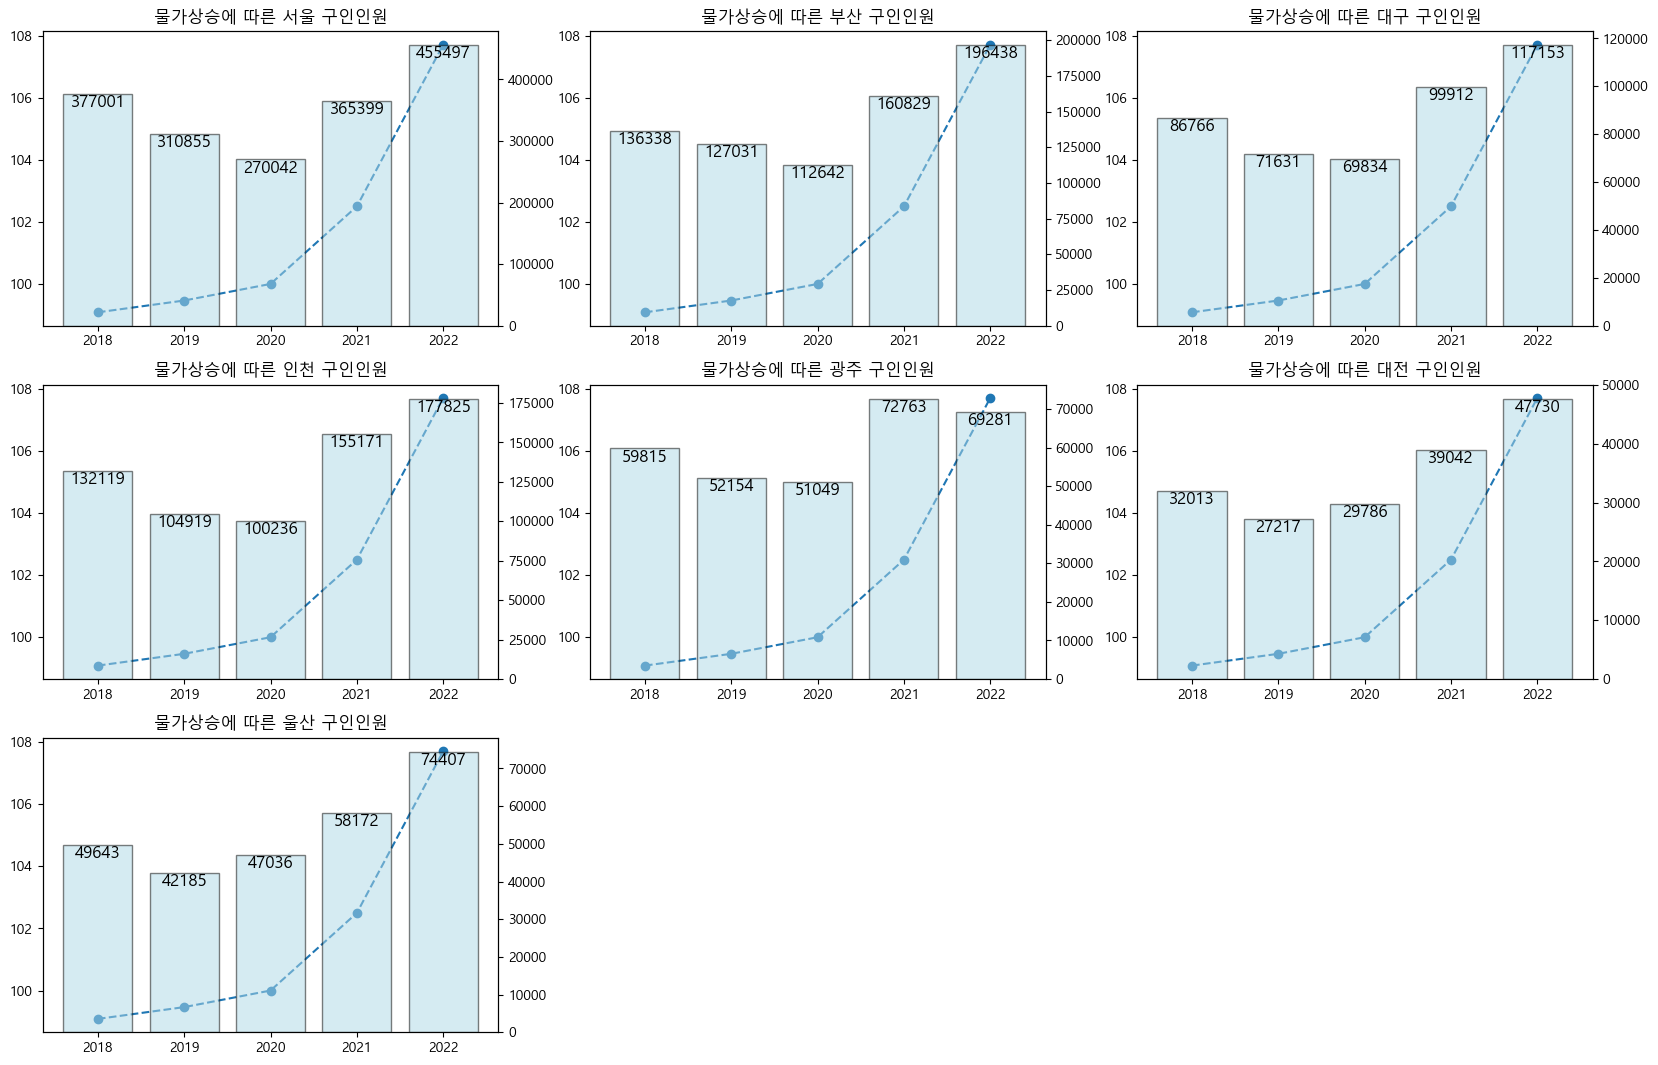

In [35]:
plt.figure(figsize=(20,13))

for i in range(len(final.columns)):
    plt.subplot(3, 3, i+1)
    
    plt.plot(final.index, df_price['전국'], linestyle = '--', marker = 'o')
    
    plt.twinx()
    
    bar = plt.bar(final.index, final[final.columns[i]].to_list(), color = 'lightblue', alpha = 0.5, edgecolor = 'black')
    
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='top', size = 12)

    plt.title(f"물가상승에 따른 {final.columns[i]} 구인인원")

plt.show()

In [15]:
seoul = df_job.iloc[[6, 11, 12, 15]]
busan = df_job.iloc[[28, 33, 34, 37]]
daegu = df_job.iloc[[50, 55, 56, 59]]
incheon = df_job.iloc[[71, 76, 77, 80]]
gwangju = df_job.iloc[[92, 97, 98, 101]]
daejun = df_job.iloc[[113, 118, 119, 122]]
ulsan = df_job.iloc[[135, 140, 141, 144]]

In [36]:
seoul

2018년 01월 2018년 02월 2018년 03월 2018년 04월  \
NaN 10차_전기, 가스, 증기 및 공기조절 공급업        48        20        67        34   
    10차_숙박 및 음식점업                 1,166       973     1,523     1,354   
    10차_정보통신업                     1,251       954     1,589     1,364   
    10차_전문, 과학 및 기술 서비스업          1,523     1,049     1,562     1,492   

                              2018년 05월 2018년 06월 2018년 07월 2018년 08월  \
NaN 10차_전기, 가스, 증기 및 공기조절 공급업        49        34        45        12   
    10차_숙박 및 음식점업                 1,363     1,626     1,451     1,507   
    10차_정보통신업                     1,325     1,319     1,384     2,105   
    10차_전문, 과학 및 기술 서비스업          1,125     1,764     1,413     1,507   

                              2018년 09월 2018년 10월  ... 2022년 03월 2022년 04월  \
NaN 10차_전기, 가스, 증기 및 공기조절 공급업        17        29  ...        31        35   
    10차_숙박 및 음식점업                 1,147     1,463  ...     1,568     1,884   
    10차_정보통신업                     1,900     1,878  ...     2,367     2,364   
    10차_전문, 과학 및 기술 서비스업          1,234     2,277  ...     1,877     2,046   

                              2022년 05월 2022년 06월 2022년 07월 2022년 08월  \
NaN 10차_전기, 가스, 증기 및 공기조절 공급업        33        28        30        35   
    10차_숙박 및 음식점업                 2,315     2,342     2,154     2,562   
    10차_정보통신업                     2,276     1,954     2,156     2,319   
    10차_전문, 과학 및 기술 서비스업          2,032     2,278     2,002     2,113   

                              2022년 09월 2022년 10월 2022년 11월 2022년 12월  
NaN 10차_전기, 가스, 증기 및 공기조절 공급업        65        90        40        52  
    10차_숙박 및 음식점업                 2,068     2,154     1,991     1,436  
    10차_정보통신업                     1,926     2,207     2,047     1,743  
    10차_전문, 과학 및 기술 서비스업          2,325     1,993     2,108     1,624  

[4 rows x 60 columns]

In [16]:
name = ['전기, 가스, 증기 및 공기조절 공급업', '숙박 및 음식점업', '정보통신업', '전문, 과학 및 기술 서비스업']
city = [seoul, busan, daegu, incheon, gwangju, daejun, ulsan]

In [17]:
for i in range(len(city)):
    city[i] = city[i].transpose()
    city[i].columns = name
    city[i]
    
    city[0].columns

In [18]:
for i in range(len(city)):
    for j in range(4):
        city[i][city[i].columns[j]] = city[i][city[i].columns[j]].apply(lambda x : x.replace(',',''))
        city[i] = city[i].astype({city[i].columns[j] : 'int64'})

In [19]:
for i in range(len(city)):
    city[i].reset_index(inplace=True)
    city[i]['index'] = city[i]['index'].apply(lambda v : v.split()[0][:4])

In [20]:
for j in range(len(city)):
    city[i] = city[i].groupby('index').sum()

In [37]:
city[0]

,index,"전기, 가스, 증기 및 공기조절 공급업",숙박 및 음식점업,정보통신업,"전문, 과학 및 기술 서비스업"
0,2018,48,1166,1251,1523
1,2018,20,973,954,1049
2,2018,67,1523,1589,1562
3,2018,34,1354,1364,1492
4,2018,49,1363,1325,1125
5,2018,34,1626,1319,1764
6,2018,45,1451,1384,1413
7,2018,12,1507,2105,1507
8,2018,17,1147,1900,1234
9,2018,29,1463,1878,2277


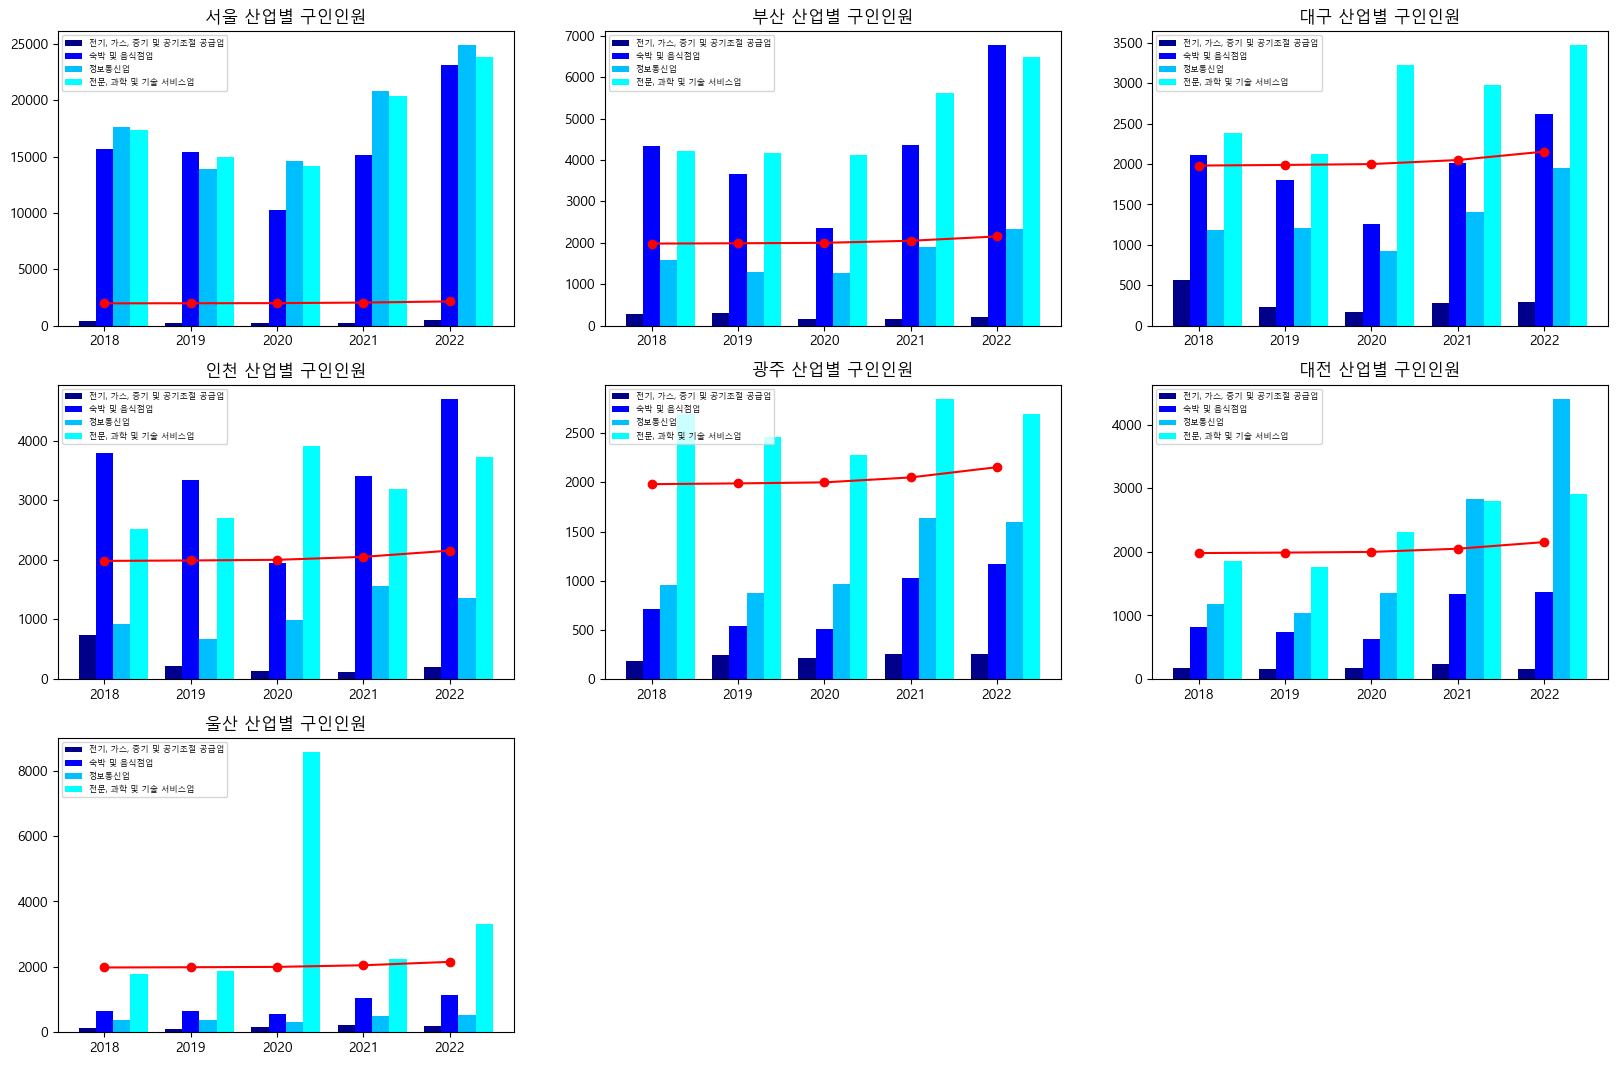

In [34]:
plt.figure(figsize=(20,13))

for i in range(len(final.columns)):
    plt.subplot(3, 3, i+1)
    
    n, t, d, w = 1, 4, 5, 0.8
    store1 = [t*element + w*n for element in range(d)]
    b1 = plt.bar(store1, list(city[i].groupby('index').sum()[name[0]]), label = name[0], color = 'darkblue')

    n, t, d, w = 2, 4, 5, 0.8
    store2 = [t*element + w*n for element in range(d)]
    b2 = plt.bar(store2, list(city[i].groupby('index').sum()[name[1]]), label = name[1], color = 'blue')

    n, t, d, w = 3, 4, 5, 0.8
    store3 = [t*element + w*n for element in range(d)]
    b3 = plt.bar(store3, list(city[i].groupby('index').sum()[name[2]]), label = name[2], color = 'deepskyblue')

    n, t, d, w = 4, 4, 5, 0.8
    store4 = [t*element + w*n for element in range(d)]
    b4 = plt.bar(store4, list(city[i].groupby('index').sum()[name[3]]), label = name[3], color = 'cyan')
    
    plt.plot(store2, df_price['전국']*20, marker = 'o', color = 'red')
    plt.legend(fontsize = 6, loc = 2)
    plt.xticks(store2,df_price.index)
    plt.title(f"{final.columns[i]} 산업별 구인인원")
    
plt.show()

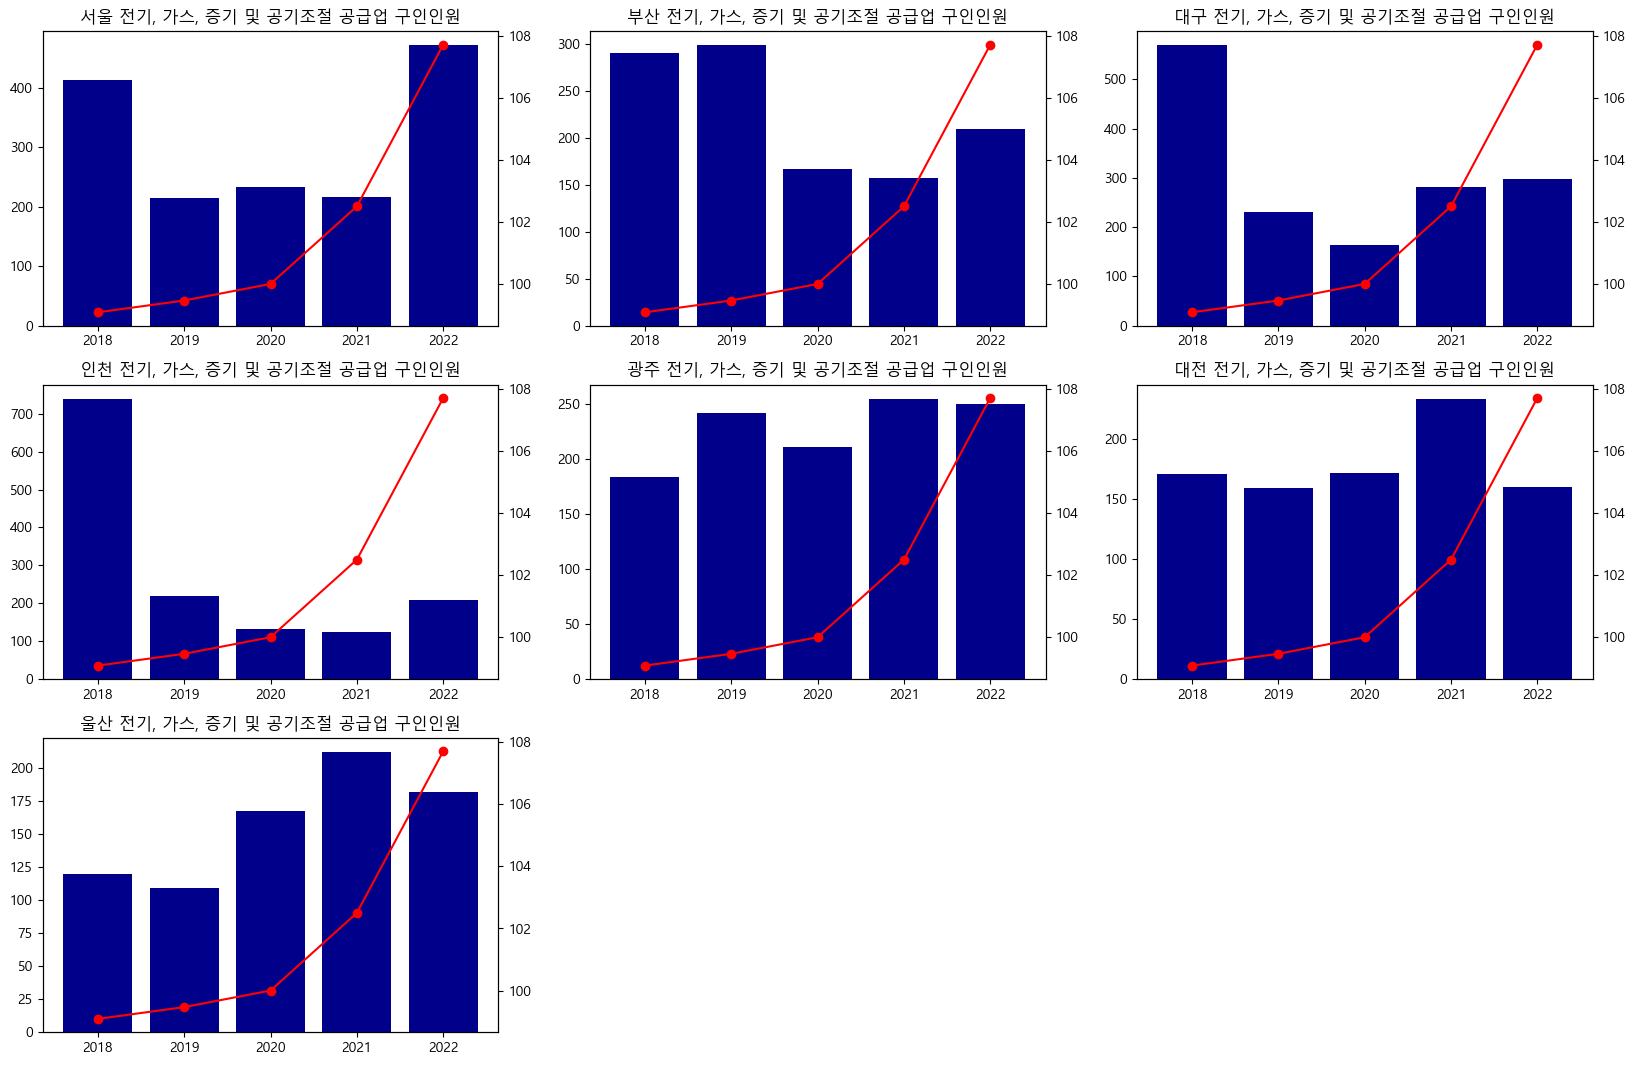

In [33]:
plt.figure(figsize=(20,13))

for i in range(len(final.columns)):
    plt.subplot(3, 3, i+1)
    
    plt.bar(df_price.index, list(city[i].groupby('index').sum()[name[0]]), label = name[0], color = 'darkblue')
    plt.twinx()
    plt.plot(df_price.index, df_price['전국'], marker = 'o', color = 'red')
    
    plt.title(f"{final.columns[i]} 전기, 가스, 증기 및 공기조절 공급업 구인인원")